<a href="https://colab.research.google.com/github/Juliana001/lia1_2024_1/blob/main/Entregas%20-%20Juliana%20Rocha/tarefa_aula_17_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<hr>
<div class="container">
    <img src='https://veja.abril.com.br/wp-content/uploads/2023/04/2836-Geral-Intelige%CC%82ncia-Artificial2.jpg?quality=90&strip=info&w=720&h=440&crop=1' align='left' width='180'  height='200' />
</div>

<h1>Laboratório de Inovação e Automação 1 (LIA 1)</h1>
	<div>  2024/1 | 24M34 | Sala 200 CAE</ </div>
<hr>

/<h2> Projeto para entrega aula 17/04 - Colab </h2>
Notebook desenvolvido por: <a href="http://lattes.cnpq.br/4885240677233306"> Juliana do Nascimento Rocha</a>

<hr>

```
# Isto está formatado como código
```

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df_ss = pd.read_csv('/content/drive/MyDrive/Aula 17 04/cursos-presencial-graduacao - cursos-presencial-graduacao.csv')

In [3]:
# Shape
df_ss.shape

(78, 6)

In [4]:
# Amostra dos dados
df_ss.head()

,Codigo E-mec,Curso,Turno,Modalidade,Vagas,Campus
0,1322751,Bacharelado em Administração,Matutino,Presencial,50,Lagoa do Sino
1,115084,Bacharelado em Administração,Noturno,Presencial,60,Sorocaba
2,115102,Bacharelado em Agroecologia,Matutino,Presencial,40,Araras
3,634,Bacharelado em Biblioteconomia e Ciência da In...,Noturno,Presencial,48,São Carlos
4,115104,Bacharelado em Biotecnologia,Matutino,Presencial,40,São Carlos


In [5]:
# Amostra dos dados
df_ss.tail()

,Codigo E-mec,Curso,Turno,Modalidade,Vagas,Campus
73,109378,Bacharelado em Engenharia Ambiental,Matutino,EAD,150,EAD
74,109353,Licenciatura em Pedagogia,Matutino,EAD,210,EAD
75,99,Licenciatura em Segunda Licenciatura em Educaç...,Matutino,EAD,600,EAD
76,108016,Bacharelado em Sistemas de Informação,Matutino,EAD,150,EAD
77,109341,Bacharelado em Superior de Tecnologia em Produ...,Matutino,EAD,125,EAD


In [6]:
# Colunas do conjunto de dados
df_ss.columns

Index(['Codigo E-mec', 'Curso', 'Turno', 'Modalidade', 'Vagas', 'Campus'], dtype='object')

In [7]:
# Verificando o tipo de dado de cada coluna
df_ss.dtypes

Codigo E-mec     int64
Curso           object
Turno           object
Modalidade      object
Vagas            int64
Campus          object
dtype: object

In [8]:
# Resumo estatístico da coluna com as Vagas
df_ss['Vagas'].describe()

count     78.000000
mean      56.820513
std       71.162471
min       18.000000
25%       30.000000
50%       40.000000
75%       60.000000
max      600.000000
Name: Vagas, dtype: float64

In [9]:
# Verificando se há registros duplicados
df_ss[df_ss.duplicated()]

,Codigo E-mec,Curso,Turno,Modalidade,Vagas,Campus


In [10]:
# Verificando de há valores ausentes
df_ss.isnull().sum()

Codigo E-mec    0
Curso           0
Turno           0
Modalidade      0
Vagas           0
Campus          0
dtype: int64

#1. Qual o curso com maior número de vagas?

<!-- #1 Qual é o curso com maior número de vagas da UFSCAR -->

In [11]:
# Primeiro filtramos o dataframe com os registros da categoria que desejamos
df_ss_p1 = df_ss[df_ss['Vagas'] == 'Vagas']

In [12]:
# Convertendo a coluna 'Vagas' para um formato numérico
df_ss['Vagas'] = pd.to_numeric(df_ss['Vagas'], errors='coerce')

# Encontrando o índice do curso com o maior número de vagas
indice_max_vagas = df_ss['Vagas'].idxmax()

# Obtendo o nome do curso correspondente ao índice encontrado
curso_com_mais_vagas = df_ss.loc[indice_max_vagas, 'Curso']

print("O curso com o maior número de vagas é:", curso_com_mais_vagas)

O curso com o maior número de vagas é: Licenciatura em Segunda Licenciatura em Educação Especial


#2. Quantas vagas a universidade oferece por ano?

In [13]:
# Convertendo a coluna 'Vagas' para um formato numérico
df_ss['Vagas'] = pd.to_numeric(df_ss['Vagas'], errors='coerce')

# Somando a quantidade total de vagas oferecidas
total_vagas_oferecidas = df_ss['Vagas'].sum()

print("O total de vagas oferecidas por todos os cursos é:", total_vagas_oferecidas)

O total de vagas oferecidas por todos os cursos é: 4432


#3. Qual é o total de vagas oferecidas por modalidade de ensino?

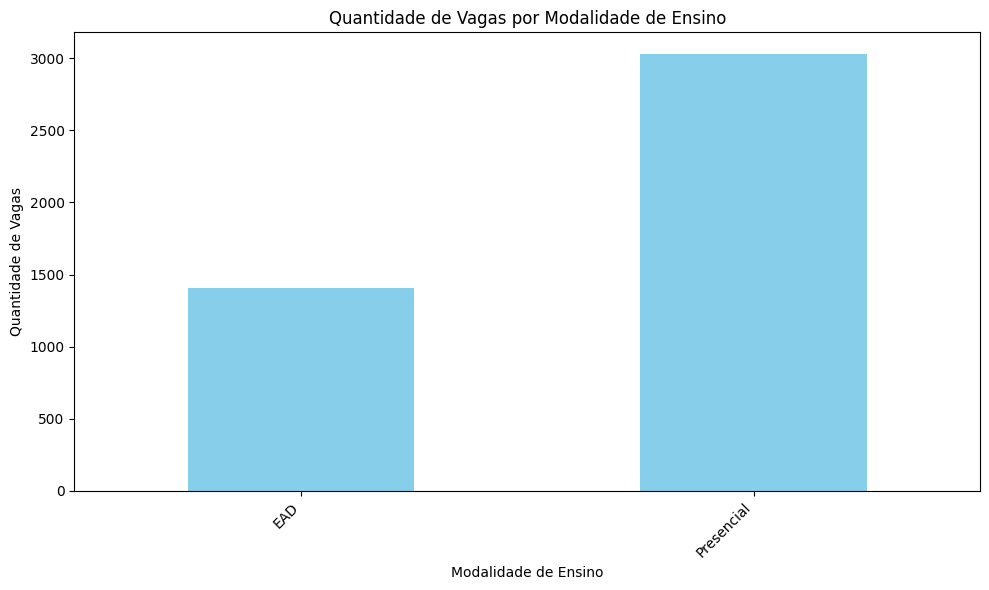

In [14]:

# Convertendo a coluna 'Vagas' para um formato numérico
df_ss['Vagas'] = pd.to_numeric(df_ss['Vagas'], errors='coerce')

# Agrupando os dados por modalidade de ensino e somando as vagas para cada grupo
vagas_por_modalidade = df_ss.groupby('Modalidade')['Vagas'].sum()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
vagas_por_modalidade.plot(kind='bar', color='skyblue')
plt.title('Quantidade de Vagas por Modalidade de Ensino')
plt.xlabel('Modalidade de Ensino')
plt.ylabel('Quantidade de Vagas')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para facilitar a leitura
plt.tight_layout()  # Ajusta o layout para evitar que os rótulos se sobreponham
plt.show()

#4. Quais são os 10 cursos com maior número de vagas?

In [15]:
# Primeiro filtramos o dataframe com os registros da categoria que desejamos
df_ss_p1 = df_ss[df_ss['Vagas'] == 'Vagas']

In [16]:
# Convertendo a coluna 'Vagas' para um formato numérico
df_ss['Vagas'] = pd.to_numeric(df_ss['Vagas'], errors='coerce')

# Ordenando o DataFrame pela coluna 'Vagas' em ordem decrescente
df_sorted = df_ss.sort_values(by='Vagas', ascending=False)

# Selecionando os 10 cursos com mais vagas
top_10_cursos = df_sorted.head(10)

print("Os 10 cursos com mais vagas são:")
print(top_10_cursos[['Curso', 'Vagas']])


Os 10 cursos com mais vagas são:
                                                Curso  Vagas
75  Licenciatura em Segunda Licenciatura em Educaç...    600
74                          Licenciatura em Pedagogia    210
72                   Licenciatura em Educação Musical    170
76              Bacharelado em Sistemas de Informação    150
73                Bacharelado em Engenharia Ambiental    150
77  Bacharelado em Superior de Tecnologia em Produ...    125
30              Bacharelado em Engenharia de Produção    100
16                    Bacharelado em Ciências Sociais     90
36                  Bacharelado em Engenharia Química     80
29             Bacharelado em Engenharia de Materiais     80


#5. Quais são os 10 cursos com menos vagas?

In [17]:
# Ordenando o DataFrame pela coluna 'Vagas' em ordem crescente
df_sorted = df_ss.sort_values(by='Vagas', ascending=True)

# Selecionando os 10 cursos com menos vagas
bottom_10_cursos = df_sorted.head(10)

print("Os 10 cursos com menos vagas são:")
print(bottom_10_cursos[['Curso', 'Vagas']])


Os 10 cursos com menos vagas são:
                                Curso  Vagas
38          Licenciatura em Filosofia     18
39           Bacharelado em Filosofia     18
58          Bacharelado em Matemática     20
50  Licenciatura em Letras - Espanhol     20
51    Licenciatura em Letras - Inglês     20
60             Licenciatura em Música     24
44             Licenciatura em Física     25
41              Bacharelado em Física     25
40             Licenciatura em Física     25
53         Licenciatura em Matemática     25


#Desafios

#1 - Desafio nível 1

Quantos alunos a universidade recebe por ano nos turnos matutino, integral e noturno?

In [18]:
# Convertendo a coluna 'Vagas' para um formato numérico
df_ss['Vagas'] = pd.to_numeric(df_ss['Vagas'], errors='coerce')

# Filtrando os dados para cada turno
vagas_matutino = df_ss[df_ss['Turno'] == 'Matutino']['Vagas'].sum()
vagas_integral = df_ss[df_ss['Turno'] == 'Integral']['Vagas'].sum()
vagas_noturno = df_ss[df_ss['Turno'] == 'Noturno']['Vagas'].sum()

# Calculando o total de alunos para cada turno
total_alunos_matutino = vagas_matutino
total_alunos_integral = vagas_integral
total_alunos_noturno = vagas_noturno

print("Total de alunos recebidos por ano nos turnos:")
print("Matutino:", total_alunos_matutino)
print("Integral:", total_alunos_integral)
print("Noturno:", total_alunos_noturno)


Total de alunos recebidos por ano nos turnos:
Matutino: 3613
Integral: 110
Noturno: 709


#2 - Desafio nível 2

Qual campus tem mais aulas no matutino, integral e noturno?

In [19]:
# Contando o número de cursos oferecidos em cada campus para cada turno
campus_matutino = df_ss[df_ss['Turno'] == 'Matutino']['Campus'].value_counts().idxmax()
campus_integral = df_ss[df_ss['Turno'] == 'Integral']['Campus'].value_counts().idxmax()
campus_noturno = df_ss[df_ss['Turno'] == 'Noturno']['Campus'].value_counts().idxmax()

print("Campus com mais aulas no turno matutino:", campus_matutino)
print("Campus com mais aulas no turno integral:", campus_integral)
print("Campus com mais aulas no turno noturno:", campus_noturno)


Campus com mais aulas no turno matutino: São Carlos
Campus com mais aulas no turno integral: São Carlos
Campus com mais aulas no turno noturno: São Carlos
